## Motivation

#### Current situation

* Unused information: Quantitative gel analysis only if strictly required
* Low reproducibility: Doing it in Fiji is not reproducible, as ROIs are drawn by hand
* Poor data availability: After lane profile extraction in fiji, the csv files have to be read in and organized again to be used in python.
* Poor sharability: Images and reproducible analysis code, if existing, are commonly shared as two entities, increasing the hurdle to check and continue working on them.

#### Goal of gelpy

* "Free" data extraction: Let quantitative data extraction be something you do without thinking much about
* 100% reproducibility : Same gel - same code -same parameter - same result
* Direct access to data: Be it the image, line profiles or relative peak areas: Everything is already a python object and can directly be used in custom analysis
* Share all in one box: One can export the gelpy object, share it, and another can open it up including your analysis. Collaborators will love this trick.

#### Current state of gelpy:

-> Good enought to try, raw enough to contribute

## Package presentation

#### Usecase 1: Quick visualization and preparation for your documentation

Default: You are in the lab, just took some images of a gel you are mildly interested in. You just did it to validate some experiment or so. Before you might not process the image, or you might head over to powerpoint to add some names for each well, before adding the gel to your documentation.


gelpy: After taking the image, you open a jupyter notebook, quickly setup the gel, plot the most interesting lanes and save the formatted images and add it to your documentation.

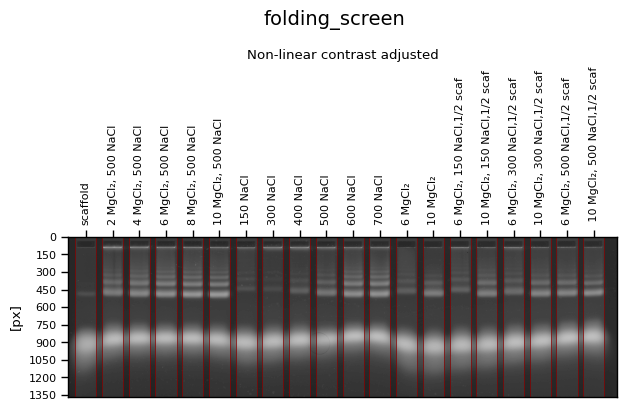

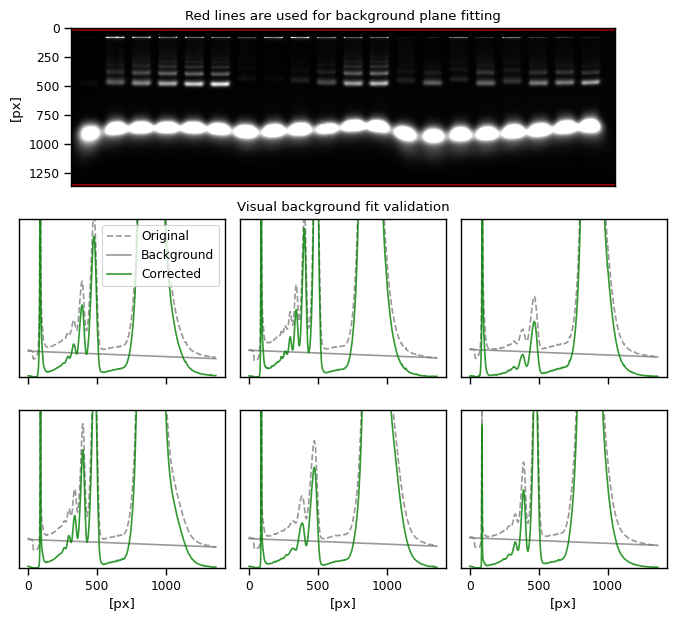

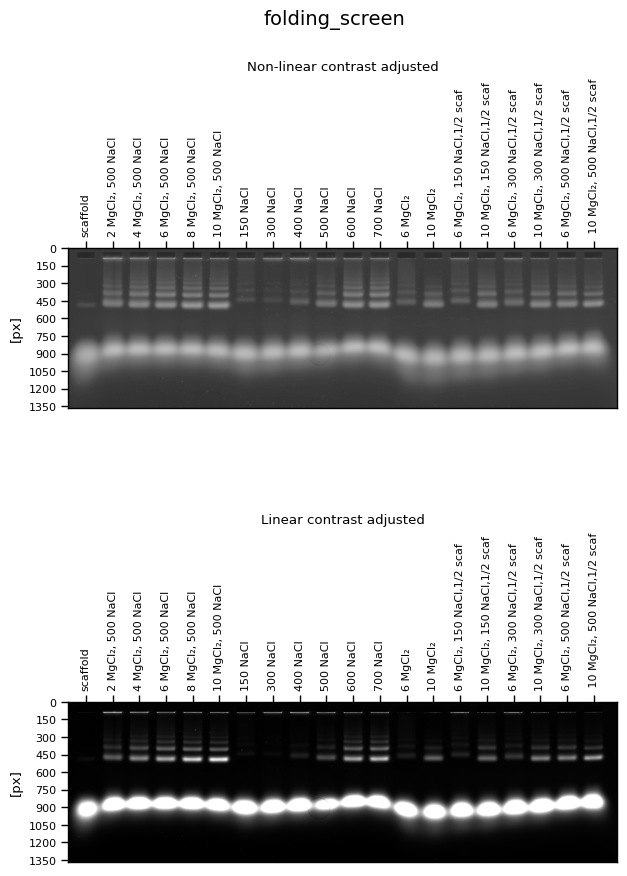

In [1]:
from gelpy import Gel

gel = Gel("./data/folding_screen.tif") # reading in a raw .tif image


# gel.setup_gel()
# gel.show_adjusted_images(save_adjusted_gels="test123.jpg")

# gel.setup_gel(x_label_pos=(150, 4480, 20), 
#               remove_bg=True)           #, line_profile_width=150)

labels = ["scaffold", "2 MgCl₂, 500 NaCl","4 MgCl₂, 500 NaCl","6 MgCl₂, 500 NaCl","8 MgCl₂, 500 NaCl","10 MgCl₂, 500 NaCl","150 NaCl","300 NaCl","400 NaCl","500 NaCl","600 NaCl", "700 NaCl","6 MgCl₂","10 MgCl₂","6 MgCl₂, 150 NaCl,1/2 scaf","10 MgCl₂, 150 NaCl,1/2 scaf","6 MgCl₂, 300 NaCl,1/2 scaf","10 MgCl₂, 300 NaCl,1/2 scaf","6 MgCl₂, 500 NaCl,1/2 scaf"," 10 MgCl₂, 500 NaCl,1/2 scaf"]
gel.setup_gel(labels=labels, x_label_pos=(150, 4485, 20),
              label_rotation=90,
              line_profile_width=180, #try 150
              remove_bg=True,
              img_height_factor=1)
gel.show_adjusted_images()

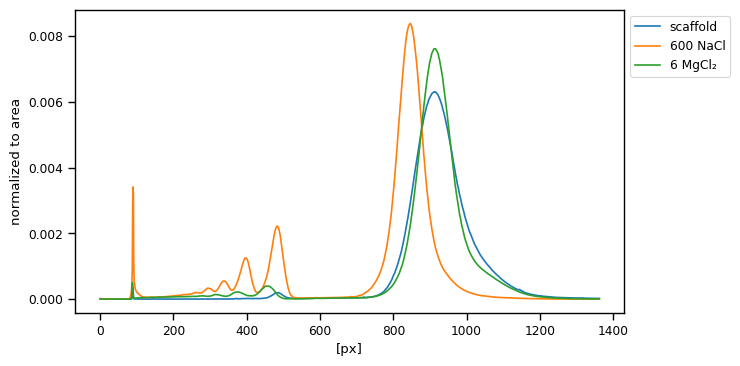

In [2]:
# Analyze and plot the lane profiles

# gel.show_line_profiles()
# gel.show_line_profiles(select_lanes=[".*150 *", ".*300.*"], save_overview="overview_plots_2.svg")
gel.show_line_profiles(select_lanes=["scaffold",12,"600 NaCl"], save_overview="overview_plots_1.png")

#### Usecase 2: Detailed analysis of a DNA origami folding screen

Defaul: After taking the gel image, you load it into Fiji, set the contrast etc., google how to do gel analysis again in Fiji, start drawing rectangles, generate line profiles, start drawing lines in the line profiles to seperate peaks, use the magic wand tool to get the area within each marked peak, export the data as a csv file, read the csv file into e.g. python, start plotting the data and wonder the whole time, if you should have drawn this rectangle or line a bit more left or right.


gelpy: After taking the image, you open a jupyter notebook, quickly setup the gel, plot and analyze the relevant lanes, save the formatted images to add it to your documentation. You then acess the gelpy df to nativly plot the folding yields. Whenever you want to change something, you just do it and, with one click, regenerate the rest of the analysis and plots. This is one aspect of reproducability.

1. #### show a few fits which are good, and some which are bad.


##### Fitting selected line profiles

/home/ckarfusehr/GelPy/src/gelpy/profile_fitting_models.py:307: RuntimeWarning: overflow encountered in exp
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)
/home/ckarfusehr/GelPy/src/gelpy/profile_fitting_models.py:307: RuntimeWarning: invalid value encountered in multiply
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)


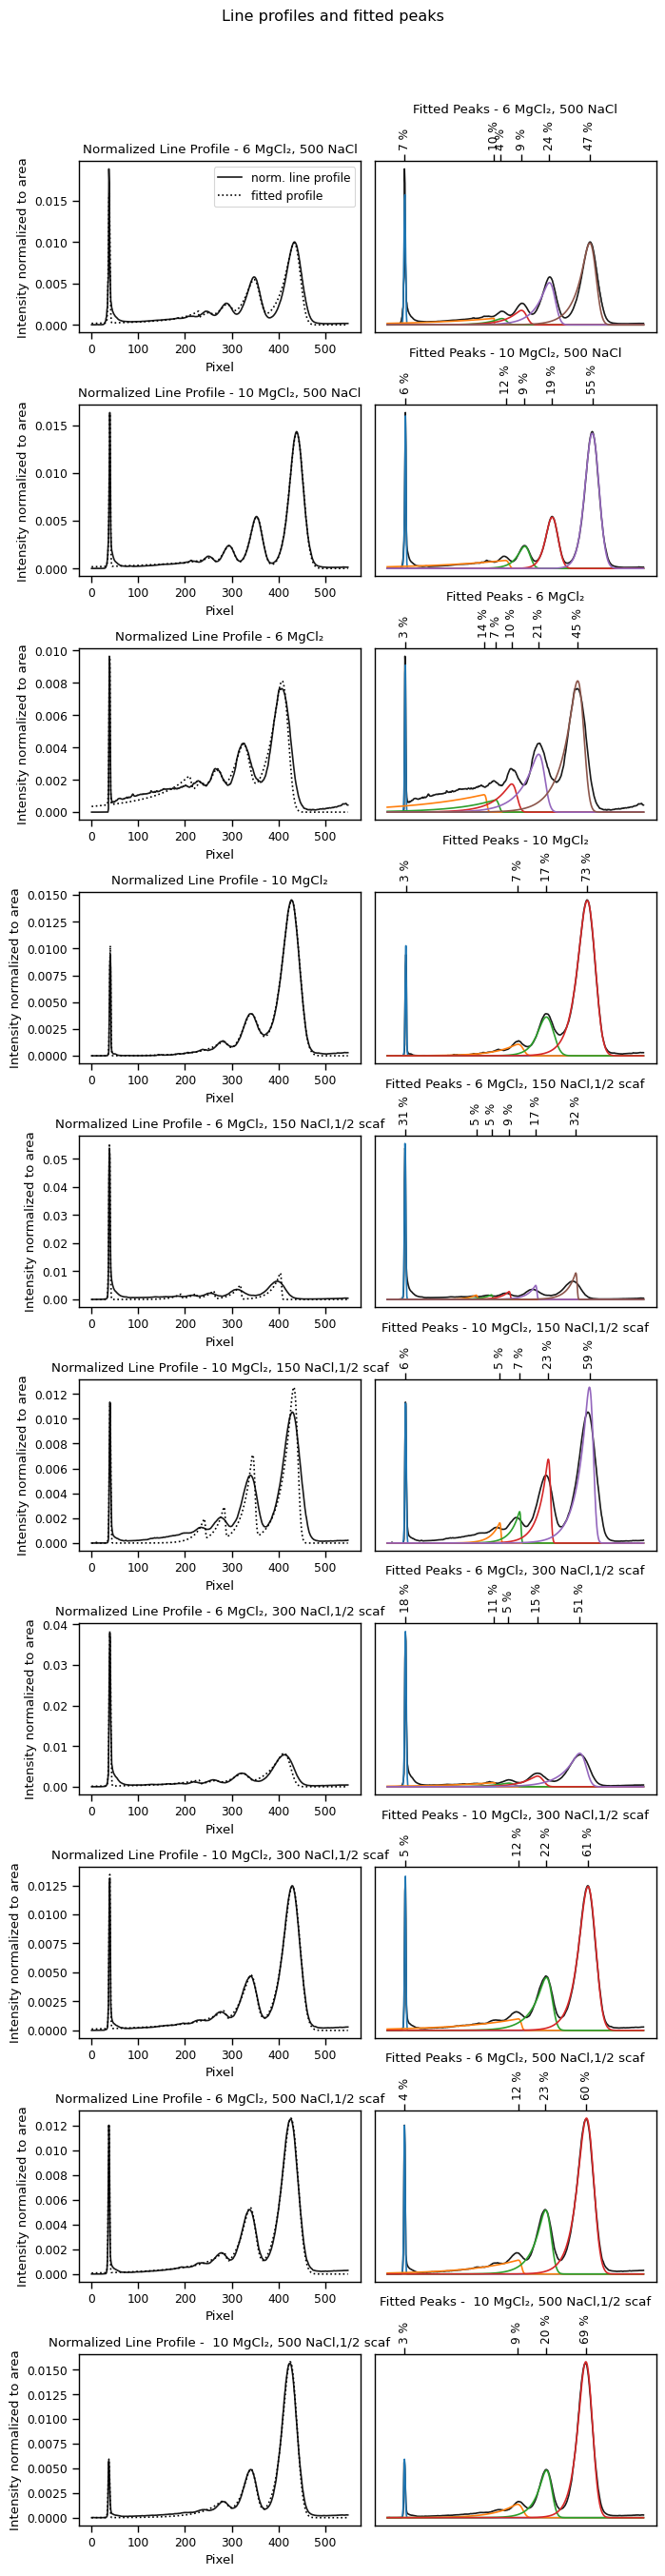

In [3]:
gel.show_line_profiles(select_lanes=[".*6 MgCl *", ".*10 MgCl*"], #["scaffold",12,"600 NaCl"],
                       slice_line_profile_length=(50, 600),
                       fit=True,
                       plot_fits=True,
                       maxima_prominence=0.000, maxima_threshold=0.001, peak_width=2,
                    #    save_fits=False,
                       show_overview=False,
                       show_df=False)
                    #    save_df=False)
                    #    save_overview=True)
                        #maxima_prominence=0.0004, maxima_threshold=0.00025,peak_width=16,

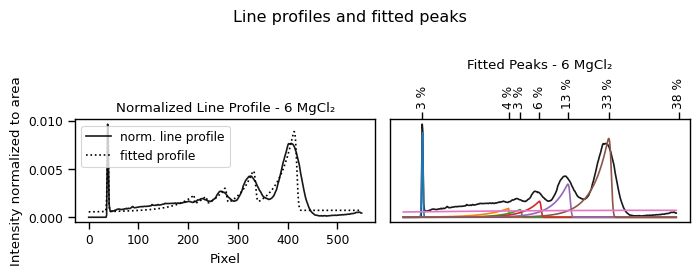

In [4]:
gel.show_line_profiles(select_lanes=[12],
                       slice_line_profile_length=(50, 600),
                       fit=True,
                       plot_fits=True,
                       maxima_prominence=0, maxima_threshold=0, peak_width=2,#16,
                    #    save_fits=detailed_fit_6_mM_MgCl2.svg,
                       show_overview=False,
                       show_df=False,)
                    #    save_df=False)
                    #    save_overview=True)

##### using the fitted data for other python code

<Axes: xlabel='label', ylabel='relative_area'>

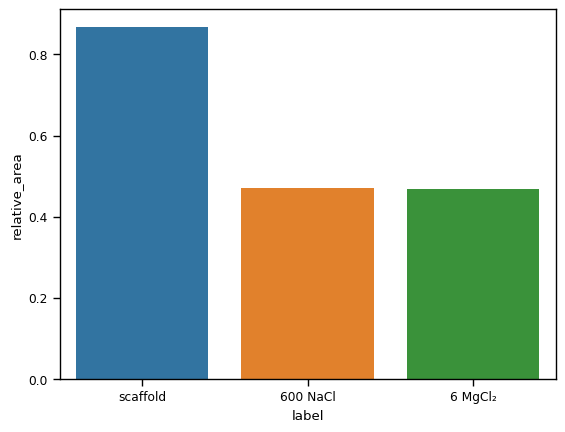

In [5]:
gel.show_line_profiles(select_lanes=["scaffold",12,"600 NaCl"],
                       slice_line_profile_length=(50, 600),
                       fit=True,
                       plot_fits=False,
                       maxima_prominence=0.0004, maxima_threshold=0.00025,
                    #    save_fits=False,
                      show_overview=False,
                       show_df=False)
                    #    save_df=False)
                    #    save_overview=True)
                        


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Fit data is saved in a pandas data frame
labels = gel.Image.labels
fit_df = gel.LineFits.fit_model.fit_df

# Some pandas data prep
df_max_band = fit_df.loc[fit_df.groupby('selected_lane_index')['band_number'].idxmax()]
df_max_band = df_max_band.sort_values('relative_area', ascending=False)
labels = df_max_band['label'].tolist()

# Plot
sns.barplot(x='label', y='relative_area', data=df_max_band, order=labels)



#### Usecase 3: Sharing data with your colleges

Default: Different scenarios: After your analysis, you send them an annotated image file and your finished analysis. If they want to reproduce it, change only a small piece in your analysis or even just want to plot the graphs to fit into their paper, they have to redo what you have done, or ask you to send them this csv file you had saved somewhere.


gelpy: After your analysis, you save the gel object and send it to them. They unpack it and are happy.

##### Just save the pandas df

In [6]:
gel.show_line_profiles(select_lanes=["scaffold",12,"600 NaCl"],
                       slice_line_profile_length=(50, 600),
                       fit=True,
                       maxima_prominence=0.0004, maxima_threshold=0.00025,
                       plot_fits=False,
                       save_fits="profile_fits2.png",
                       show_df=False,
                       save_df="folding_screen_NaCl_conditions.csv",
                       show_overview=False)

/home/ckarfusehr/GelPy/src/gelpy/profile_fitting_models.py:307: RuntimeWarning: overflow encountered in exp
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)
/home/ckarfusehr/GelPy/src/gelpy/profile_fitting_models.py:307: RuntimeWarning: invalid value encountered in multiply
  return amplitude / lambda_ * np.exp(term1) * norm.cdf(term2)


##### Just save the complete gel object

In [7]:
gel.save("230512_folding_screen")
#gel.save("230512_folding_screen", compress=True)

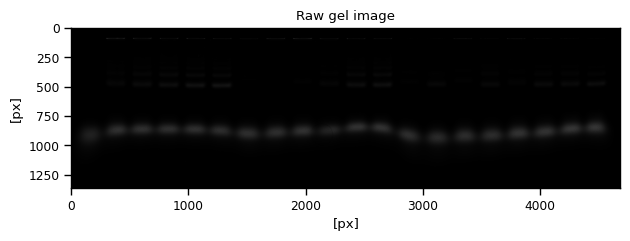

,selected_lane_index,label,band_number,relative_area,maxima_position,Amplitude,Mean,Standard Deviation,Lambda
0,0,scaffold,0,0.132,39.449,0.096,40.126,0.578,1.583
1,0,scaffold,1,0.868,435.316,0.619,444.726,12.952,13.828
2,1,600 NaCl,0,0.061,40.155,0.060,40.846,1.161,0.910
3,1,600 NaCl,1,0.221,289.919,0.231,301.718,4.938,107.618
4,1,600 NaCl,2,0.247,347.508,0.242,357.567,10.608,18.098
5,1,600 NaCl,3,0.471,433.448,0.462,443.401,13.326,14.894
6,2,6 MgCl₂,0,0.032,38.576,0.029,39.136,0.996,0.719
7,2,6 MgCl₂,1,0.283,268.242,0.275,276.830,4.159,106.257
8,2,6 MgCl₂,2,0.216,324.336,0.195,336.610,9.081,34.334
9,2,6 MgCl₂,3,0.469,407.757,0.422,420.013,10.027,29.912


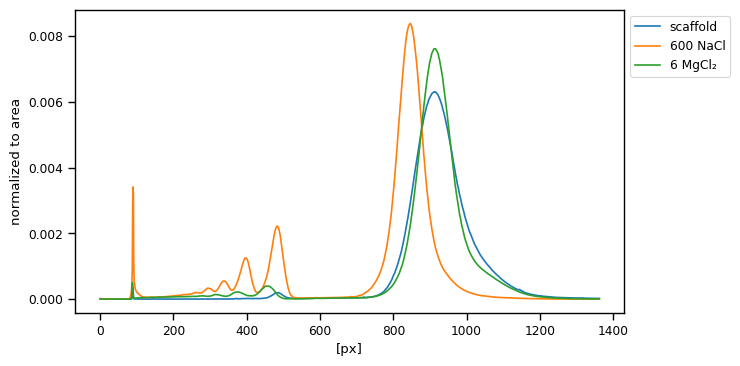

In [8]:
# Your collaborator loading it on another machine:
from gelpy import Gel
loaded_gel = Gel.load("230512_folding_screen.pkl")

loaded_gel.show_raw_gel()
loaded_gel.show_line_profiles(select_lanes=["scaffold",12,"600 NaCl"], save_overview="overview_plots_1.png")
loaded_gel.LineFits.fit_model.fit_df

## Let's try, break, and improve gelpy together!

#### Ways to contribute

1. Test and report: Just try it out and report problems/ bugs on Github (link). I will try to fix them
2. Fix or extend and merge: You know how to fix a bug or want to extend the package? Fork it, fix it, merge request it.
3. Spread the word: That this package is being developed and is good enough to try, raw enough to contribute

## Conclusion

If you think about it, it is surprising that when it comes to one of the must basic experiments in the life sciences, gel electrophoresis, we researcher do a terrible job. We
discard most of the information, analyse with a low reproducibility, go through major pain when working with this data and have no standardized way of sharing the data connected to the analysis.

By presenting the Usecases I aimed to convince you that, while not being the final solution, gelpy is adressing all of these problems and, in its current state, is good enough to try, raw enough to contribute. So, please try it, break it and contribute. I'd like to invite all of you to join this fun project, aspiring to improve the way we do science a tiny bit.